# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
api_key = weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#test run to see what data looks like
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Assume we have a list of cities and an API key

# Pick the first city from your list for a test run
test_city = cities[23]
test_url = f"{url}q={test_city}&appid={api_key}"

# Make the API request
response = requests.get(test_url)
test_city_weather = response.json()
response.json()

{'coord': {'lon': -39.3719, 'lat': -17.8919},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 297.89,
  'feels_like': 298.72,
  'temp_min': 297.89,
  'temp_max': 297.89,
  'pressure': 1015,
  'humidity': 88,
  'sea_level': 1015,
  'grnd_level': 1014},
 'visibility': 10000,
 'wind': {'speed': 2.71, 'deg': 98, 'gust': 4.61},
 'clouds': {'all': 27},
 'dt': 1715332459,
 'sys': {'country': 'BR', 'sunrise': 1715331238, 'sunset': 1715372031},
 'timezone': -10800,
 'id': 3456102,
 'name': 'Nova Viçosa',
 'cod': 200}

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

       # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | oxford
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | gallivare
City not found. Skipping...
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | miles city
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | buta
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | sao pedro do sul
Processing Record 16 of Set 1 | pitimbu
Processing Record 17 of Set 1 | morehead
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | nazyvayevsk
Processing Re

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          608
Lat           608
Lng           608
Max Temp      608
Humidity      608
Cloudiness    608
Wind Speed    608
Country       608
Date          608
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,267.43,79,75,2.00,RU,1715332491
1,bethel,41.3712,-73.4140,282.68,85,100,0.45,US,1715332569
2,namibe,-15.1961,12.1522,297.97,67,72,2.14,AO,1715332570
3,oxford,51.7522,-1.2560,293.42,66,0,1.03,GB,1715332369
4,utrik,11.2278,169.8474,300.34,84,92,8.77,MH,1715332571


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_KA.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_KA.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,267.43,79,75,2.00,RU,1715332491
1,bethel,41.3712,-73.4140,282.68,85,100,0.45,US,1715332569
2,namibe,-15.1961,12.1522,297.97,67,72,2.14,AO,1715332570
3,oxford,51.7522,-1.2560,293.42,66,0,1.03,GB,1715332369
4,utrik,11.2278,169.8474,300.34,84,92,8.77,MH,1715332571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

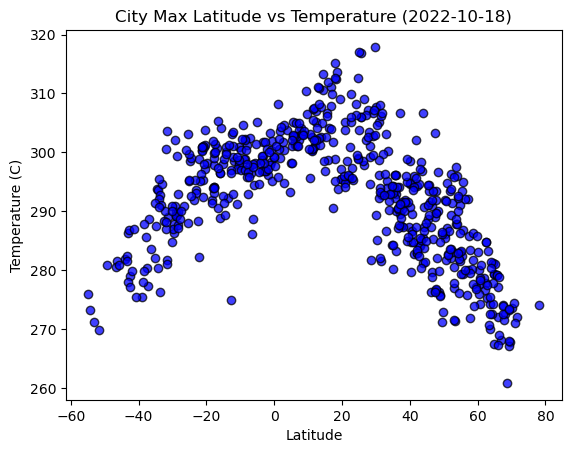

In [11]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df['Lat']
temperatures = city_data_df['Max Temp']

# Incorporate the other graph properties
# Create scatter plot
plt.scatter(latitudes, temperatures, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

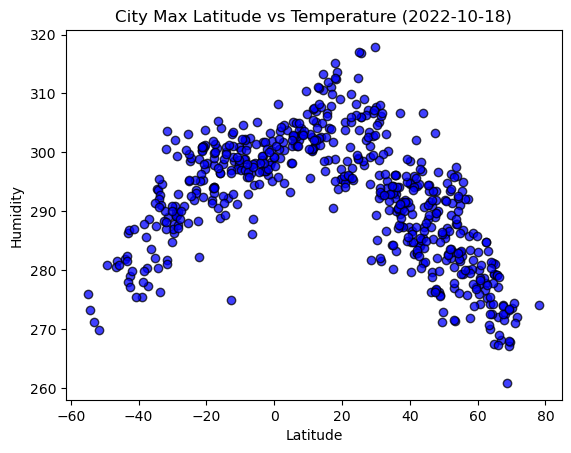

In [29]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# Extract latitude, temperature, and humidity data from the DataFrame
latitudes = city_data_df['Lat']
temperatures = city_data_df['Max Temp']
humidity = city_data_df['Humidity']

# Create scatter plot
plt.scatter(latitudes, temperatures, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


# Add labels and title
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

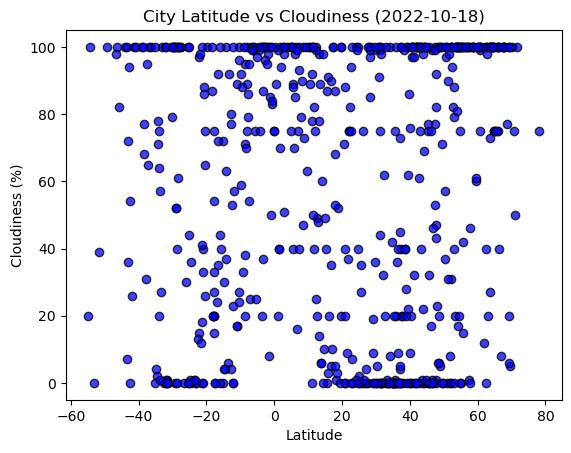

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# Create scatter plot

cloudiness = city_data_df['Cloudiness']
plt.scatter(latitudes,cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


# Add labels and title
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

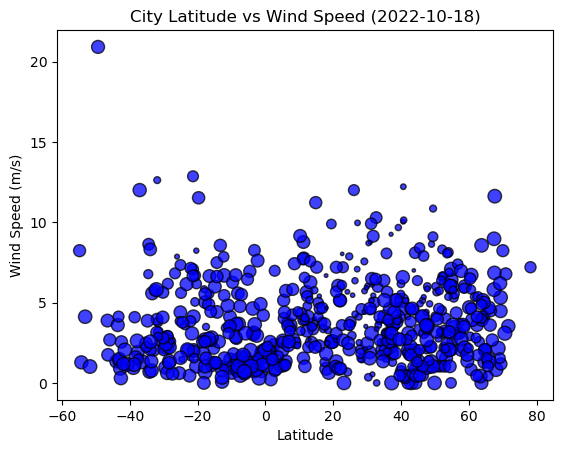

In [14]:
# Build the scatter plots for latitude vs. wind speed
Wind_speed= city_data_df['Wind Speed']

# Create scatter plot
plt.scatter(latitudes, Wind_speed, s=humidity, marker="o", c="blue", edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,267.43,79,75,2.00,RU,1715332491
1,bethel,41.3712,-73.4140,282.68,85,100,0.45,US,1715332569
3,oxford,51.7522,-1.2560,293.42,66,0,1.03,GB,1715332369
4,utrik,11.2278,169.8474,300.34,84,92,8.77,MH,1715332571
6,tiksi,71.6872,128.8694,272.03,91,100,3.53,RU,1715332431


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,namibe,-15.1961,12.1522,297.97,67,72,2.14,AO,1715332570
5,bredasdorp,-34.5322,20.0403,293.72,42,2,6.77,ZA,1715332449
8,vila velha,-20.3297,-40.2925,297.12,94,75,1.03,BR,1715332575
10,geraldton,-28.7667,114.6000,299.38,61,40,6.17,AU,1715332576
12,waitangi,-43.9535,-176.5597,281.94,88,100,1.34,NZ,1715332408


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6616267794022404


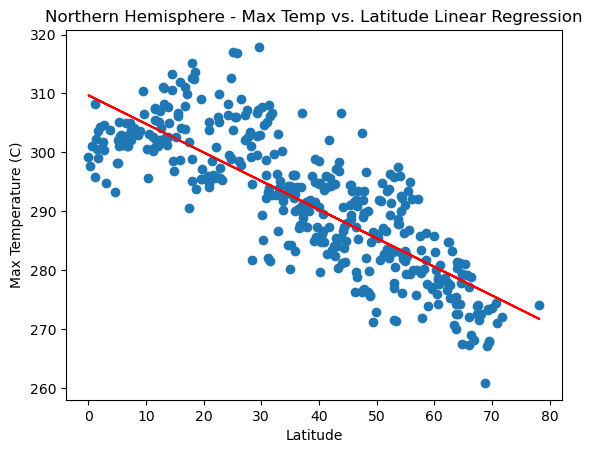

In [18]:
# Linear regression on Northern Hemisphere

# Assuming you have a DataFrame named northern_hemi_df with columns 'Lat' and 'Max Temp'
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (C)', 
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       (10, 0))

The r-squared is: 0.5494128335268204


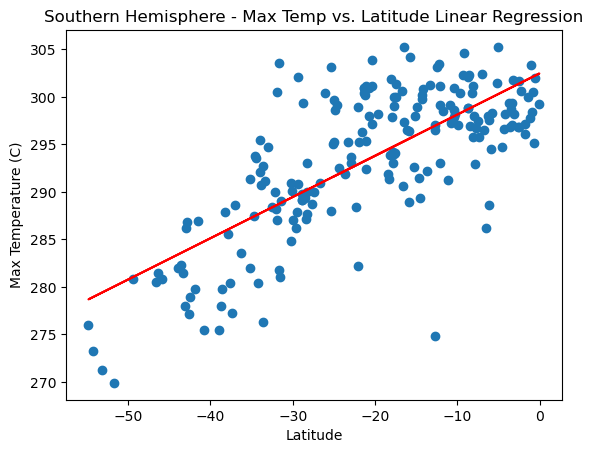

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (C)', 
                       'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       (-50, 35))

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there's a moderate negative linear relationship between a cities latitude and maximum temperature, indicating that temperatures decrease as you move away from the equator. Conversely, in the Southern Hemisphere, there's a positive moderate linear relationship suggesting a cities max temperatures tend to increase as you approach the equator . 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.011289032445973866


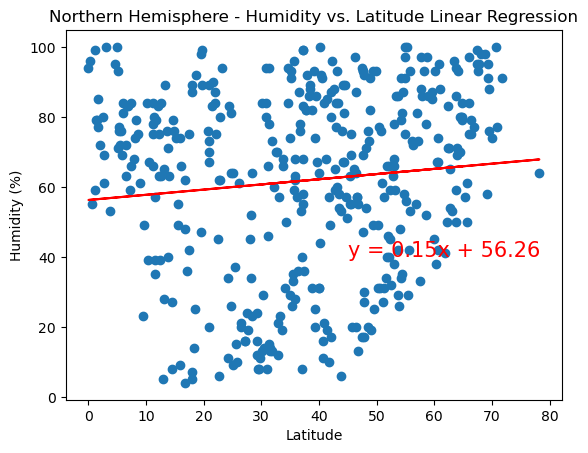

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Northern Hemisphere - Humidity vs. Latitude Linear Regression',
                       (45, 40))

The r-squared is: 0.010378187328337812


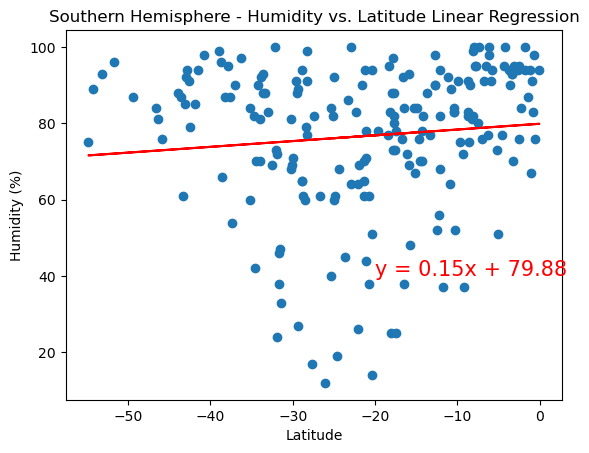

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression',
                       (-20, 40))

**Discussion about the linear relationship:** 
There appears to be no meaningful linear relationship between the latitude and Humidity (%) for cities in the southern and nortern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008817339321177946


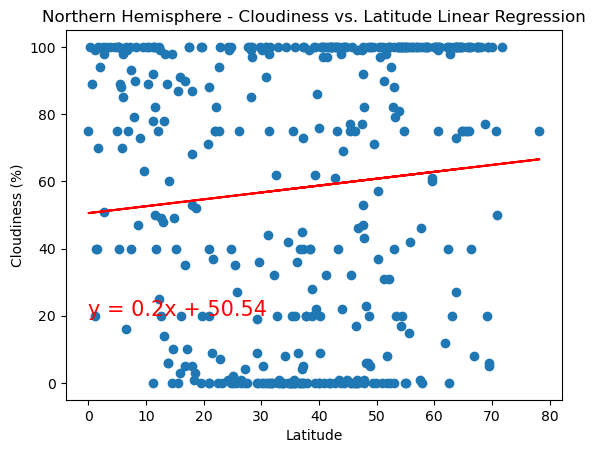

In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       (0, 20))

The r-squared is: 0.014234036896942607


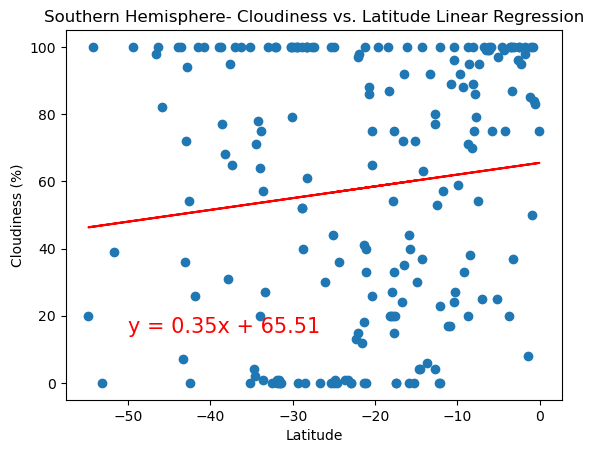

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Southern Hemisphere- Cloudiness vs. Latitude Linear Regression',
                       (-50, 15))

**Discussion about the linear relationship:** 
There appears to be no meaningful linear relationship between the latitude and Cloudiness for both cities southern and nortern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000787035959571511


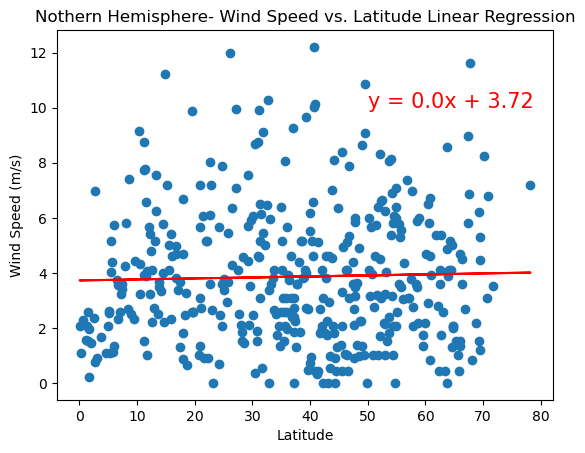

In [28]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Nothern Hemisphere- Wind Speed vs. Latitude Linear Regression',
                       (50, 10))

The r-squared is: 0.010511440479985175


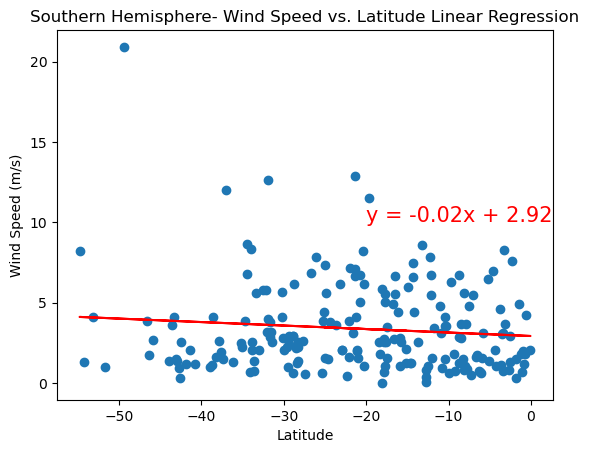

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Southern Hemisphere- Wind Speed vs. Latitude Linear Regression',
                       (-20, 10))

**Discussion about the linear relationship:** There appears to be no meaningful linear relationship between the latitude and Wind Speed for cities in the southern and nortern hemisphere. 